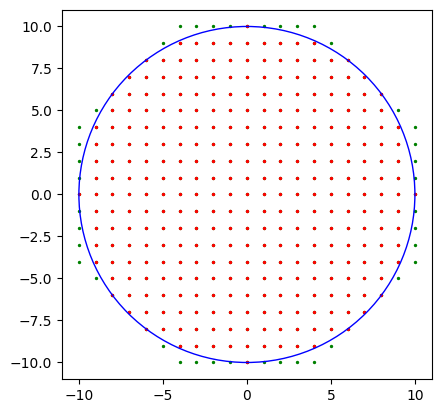

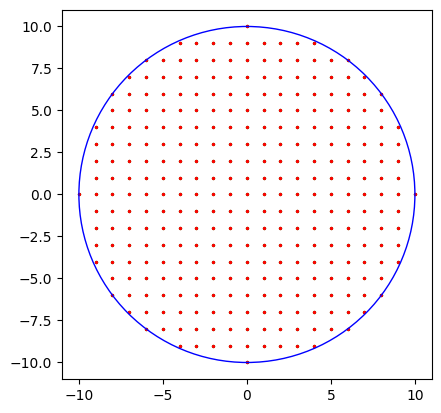

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
#Pour un cercle de diamètre D (impair), centré en (0,0)

def linear_regression(coordinates): # Y = mX+c
    # Extract x and y values from coordinates
    x = np.array([coord[0] for coord in coordinates])
    y = np.array([coord[1] for coord in coordinates])
    
    # Calculate the slope (m) and intercept (c)
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    y_pred = m * x + c
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    
    return m, c, r_squared

def plot_quadratic(a, b, c, x_start, x_end, num_points):
    quadratic_function = lambda x:int(a*x**2+b*x+c)
    # Generate x values
    x = np.linspace(x_start, x_end, 400)
    
    # Generate points within the span
    x_points = np.linspace(x_start, x_end, num_points)
    y_points = [quadratic_function(xi) for xi in x_points]
    plt.scatter(x_points, y_points, color='red', zorder=1)

def gen_points(D,n=0):
    if n==0:
        #square
        return [(D//2-i,D//2-j) for i in range(D) for j in range(D)]
    if n==1:#Pour comprendre les variables, voir le fichier geogebra ou le cahier
        #octogone
        r=D//2
        x_g=-r*((2**0.5)-1);x_d=-x_g
        CourbeSuperieure = lambda x: x+(2**0.5)*r if x<x_g else (r if x<x_d else -x+(2**0.5)*r)
        points = []
        for x in range(-r, r+1):
            bornesup = CourbeSuperieure(x)
            y = 0
            while y <= bornesup:
                points.append((x, y))
                if y+1<= bornesup:
                    points.append((x,-(y+1)))
                y += 1
        return points
    if n==2:#Sur le mm principe on en déduit le cercle
        #cercle
        r=D//2
        CourbeSuperieure = lambda x: (r**2 -x**2)**0.5
        points = []
        for x in range(-r, r+1):
            bornesup = CourbeSuperieure(x)
            y = 0
            while y <= bornesup:
                points.append((x, y))
                if y+1<= bornesup:
                    points.append((x,-(y+1)))
                y += 1
        return points

def cercle_points(D,n):
    points=gen_points(D,n)
    circle = plt.Circle((0,0), (D-1)//2, color='b', fill=False)
    x=[M[0] for M in points]
    y=[M[1] for M in points]
    plt.scatter(x,y,color='g',s=2)

    points=[i for i in points if (i[0])**2+(i[1])**2 <= (D//2)**2] #Select vertices in the circle
    x=[M[0] for M in points]
    y=[M[1] for M in points]
    #return points

    plt.scatter(x,y,color='r',s=2)
    plt.gca().add_patch(circle)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

#En notant N le nombre de points à coordonnés entières sur le disque de rayon r. On observe en traçant le graphe que N=f(r) où f n'est pas connue.
#Régression linéaire --> logN ressemble à un log qui croit plus vite sur la fin
#logN=g(logr) est une droite, g(x)=ax+b --> mouais
#N=e^(ax+b)

#En fait et c'est logique, N(r) se comporte (et ça se démontre) comme pi/4*r² en +infini

r=10
cercle_points(2*r+1,1)
cercle_points(2*r+1,2)
